In [19]:
import sys
sys.path.append("..")

In [21]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from algorithms.gradient_descent import *

# Problem Statement
Let's use two data points - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [22]:
# Load our data set
x_train = np.array([1.0, 2.0])       # features
y_train = np.array([300.0, 500.0])   # target values

In [23]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
tmp_alpha = 1.0e-2
iterations = 10000

w, b, cost_history, params_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

(w,b) found by gradient descent: (199.9929,100.0116)


### Predictions
Now that we have discovered the optimal values for the parameters $w$ and $b$, we can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [34]:
x_test = np.array([1.0, 1.2, 2.0, 4.1, 5.5, 7.3])
y_test = np.array([predict(i, w, b) for i in x_test])

for x, y in zip(x_test, y_test):
    print(f"{x*1000} sqft house prediction {y:.2f} Thousand dollars")

1000.0 sqft house prediction 300.00 Thousand dollars
1200.0 sqft house prediction 340.00 Thousand dollars
2000.0 sqft house prediction 500.00 Thousand dollars
4100.0 sqft house prediction 919.98 Thousand dollars
5500.0 sqft house prediction 1199.97 Thousand dollars
7300.0 sqft house prediction 1559.96 Thousand dollars


### Plotting

In [35]:
from typing import List, Tuple, Callable
def plot_data(x: np.ndarray, y: np.ndarray, predict_fn: Callable, 
              x_label='x', y_label='y', title='Data', color='blue') -> None:
    """
    Plots the data and the prediction line.
    """    
    order = np.argsort(x)
    x_ordered, y_ordered = x[order], y[order]
    
    plt.scatter(x_ordered, y_ordered, color=color)
    plt.plot(x_ordered, predict_fn(x_ordered), color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return None


def plot_cost_history(cost_history: List[float], x_label='Iterations', y_label='Cost', title='Cost history') -> None:
    """
    Plots the cost history.
    """
    plt.plot(cost_history, alpha=0.3)
    plt.plot(pd.Series(cost_history).rolling(window=int(len(cost_history)*0.02)+1).mean()) # for smoothed line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return None


def plot_data_and_predictions(x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray, predict_fn: Callable, x_label='x', y_label='y', title='Data and predictions') -> None:
    """
    Plots the training data, test data and the prediction line.
    """
    # Define the point size.
    point_size = 20
    
    # Plot the training data.
    order = np.argsort(x_train)
    x_train_ordered, y_train_ordered = x_train[order], y_train[order]
    plt.scatter(x_train_ordered, y_train_ordered, s=point_size, color='blue')
    plt.plot(x_train_ordered, predict_fn(x_train_ordered), color='red')
    
    # Plot the test data.
    order = np.argsort(x_test)
    x_test_ordered, y_test_ordered = x_test[order], y_test[order]
    plt.scatter(x_test_ordered, y_test_ordered, s=point_size, color='green')
    plt.plot(x_test_ordered, predict_fn(x_test_ordered), color='red')
    
    # Set labels, title and legend.
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(['Train', 'Prediction', 'Test'])
    
    plt.show()
    return None

In [36]:
from functools import partial
predict_fn = partial(predict, w=w, b=b)

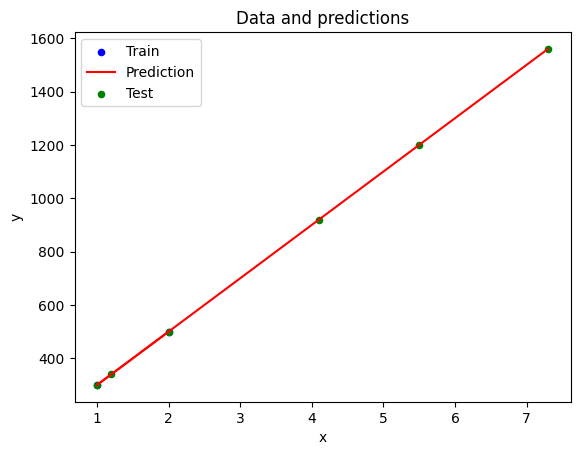

In [37]:
plot_data_and_predictions(x_train, y_train, x_test, y_test, predict_fn)

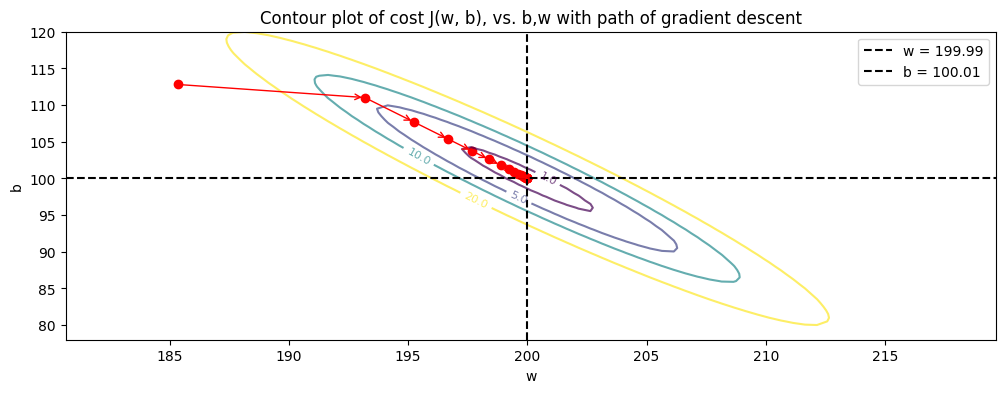

In [20]:
plot_contour(x_train, y_train, params_history)

## Large Dataset
Let's test out our model on the large dataset

In [38]:
data = pd.read_csv('archive/LR_1var_train.csv')

In [39]:
data = data.dropna()
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [40]:
x_train_vals = data['x'].values
y_train_vals = data['y'].values

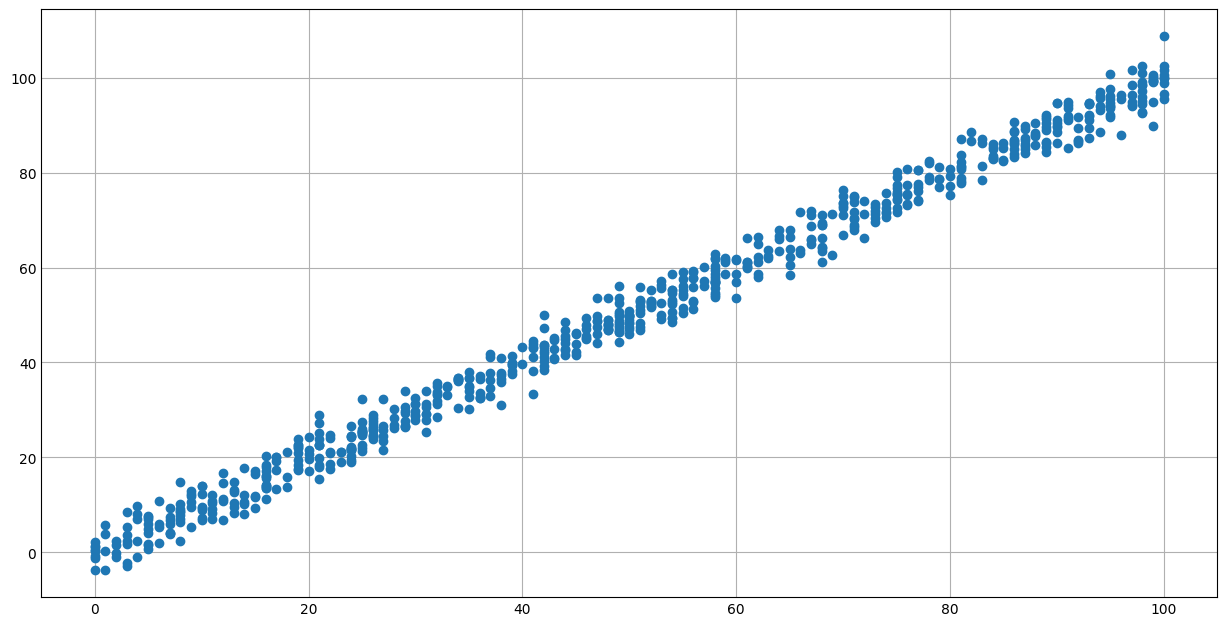

In [41]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 6))
plt.scatter(x_train_vals, y_train_vals)
plt.show()

In [46]:
# Normalize x_train
x_normalized = (x_train_vals - np.mean(x_train_vals)) / np.std(x_train_vals)

# Initialize parameters
w_init = 10
b_init = 10

# Some gradient descent settings
tmp_alpha = 1.0e-2
iterations = 10000

w, b, cost_history, params_history = gradient_descent(x_normalized, y_train_vals, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

(w,b) found by gradient descent: ( 28.9528, 49.9399)


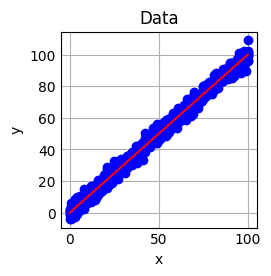

In [47]:
def predict_normalized(x: np.ndarray, w: float, b: float, x_mean: float, x_std: float) -> np.ndarray:
    x_normalized = (x - x_mean) / x_std
    return predict(x_normalized, w, b)

predict_fn_unnormalized = partial(predict_normalized, w=w, b=b, x_mean=np.mean(x_train_vals), x_std=np.std(x_train_vals))
plot_data(x_unnormalized, y_train_vals, predict_fn_unnormalized)

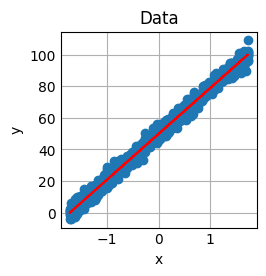

In [89]:
plot_data(x_normalized, y_train_vals, w, b)

### Predictions

In [64]:
test_data = pd.read_csv('archive/LR_1var_test.csv')
test_data = test_data.dropna()
test_data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [70]:
x_test_vals = test_data['x'].values
y_test_vals = test_data['y'].values

In [91]:
mean_X = np.mean(x_train_vals)
std_X = np.std(x_train_vals)

w_orig = w / std_X
b_orig = - w * mean_X / std_X + b

print(f"(w,b) in original scale: ({w_orig:8.4f},{b_orig:8.4f})")

(w,b) in original scale: (  1.0007, -0.1073)


In [92]:
predictions = [predict(i, w_orig, b_orig) for i in x_test_vals]